In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv("final_sales_dataset.csv",encoding='iso-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment_x,Country,City,...,Profit Margin (%),Profit Margin,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment_y
0,2698,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,-8.0,-0.08,-338,15,25043.050,3,4,5,345,Others
1,6827,CA-2016-118689,2016-10-02,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,48.0,0.48,-18,12,19052.218,1,3,5,135,At Risk
2,8154,CA-2017-140151,2017-03-23,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,48.0,0.48,-321,18,15117.339,3,5,5,355,Frequent Customers
3,2624,CA-2017-127180,2017-10-22,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,35.0,0.35,-348,10,14595.620,3,3,5,335,Others
4,4191,CA-2017-166709,2017-11-17,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,48.0,0.48,-374,11,12873.298,4,3,5,435,Others


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Row ID                       9994 non-null   int64  
 1   Order ID                     9994 non-null   object 
 2   Order Date                   9994 non-null   object 
 3   Ship Date                    9994 non-null   object 
 4   Ship Mode                    9994 non-null   object 
 5   Customer ID                  9994 non-null   object 
 6   Customer Name                9994 non-null   object 
 7   Segment_x                    9994 non-null   object 
 8   Country                      9994 non-null   object 
 9   City                         9994 non-null   object 
 10  State                        9994 non-null   object 
 11  Postal Code                  9994 non-null   int64  
 12  Region                       9994 non-null   object 
 13  Product ID        

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Month,Year,Contribution (%),Cumulative Contribution (%),Profit Margin (%),Profit Margin,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,7.809686,2015.722233,0.010006,87.186899,12.031393,0.120314,-296.718931,15.691015,3593.694483,3.189214,3.646388,3.440164,358.825395
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,3.284654,1.123555,0.027131,18.318804,46.675435,0.466754,154.841098,6.654997,2837.907488,1.379294,1.302390,1.338927,141.622696
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,2014.000000,0.000019,0.985481,-275.000000,-2.750000,-417.000000,1.000000,4.833000,1.000000,1.000000,1.000000,111.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,5.000000,2015.000000,0.000752,83.268328,7.500000,0.075000,-389.000000,11.000000,1669.135000,2.000000,3.000000,2.000000,243.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,9.000000,2016.000000,0.002372,95.497778,27.000000,0.270000,-357.000000,15.000000,2874.338000,3.000000,4.000000,4.000000,354.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,11.000000,2017.000000,0.009139,98.986397,36.250000,0.362500,-271.000000,20.000000,4715.466000,4.000000,5.000000,5.000000,455.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,12.000000,2017.000000,0.985481,100.000000,50.000000,0.500000,748.000000,37.000000,25043.050000,5.000000,5.000000,5.000000,555.000000


# SALES ANALYSIS (MONTHLY,QUARTERLY,AND YEARLY)

In [5]:

# # Convert 'Order Date' to datetime format
# df['Order Date'] = pd.to_datetime(df['Order Date'])

# # Extract month, quarter, and year from 'Order Date'
# df['Month'] = df['Order Date'].dt.month
# df['Quarter'] = df['Order Date'].dt.to_period('Q')
# df['Year'] = df['Order Date'].dt.year
# # Save the updated DataFrame to a new CSV file
# updated_data_path = "sales dataset/Sample - Superstore 1.csv"  # Replace with your desired file path
# df.to_csv(updated_data_path, index=False)


# Aggregate the sales data
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
total_sales = df['Sales'].sum()

# Display the first few rows of each aggregation to verify
print("Monthly Sales Aggregation:")
print(monthly_sales.head(50))

print("\nQuarterly Sales Aggregation:")
print(quarterly_sales.head(50))

print("\nYearly Sales Aggregation:")
print(yearly_sales.head(50))

print('\nTotal Sales Of The Years:')
print(total_sales)

Monthly Sales Aggregation:
    Year  Month        Sales
0   2014      1   14236.8950
1   2014      2    4519.8920
2   2014      3   55691.0090
3   2014      4   28295.3450
4   2014      5   23648.2870
5   2014      6   34595.1276
6   2014      7   33946.3930
7   2014      8   27909.4685
8   2014      9   81777.3508
9   2014     10   31453.3930
10  2014     11   78628.7167
11  2014     12   69545.6205
12  2015      1   18174.0756
13  2015      2   11951.4110
14  2015      3   38726.2520
15  2015      4   34195.2085
16  2015      5   30131.6865
17  2015      6   24797.2920
18  2015      7   28765.3250
19  2015      8   36898.3322
20  2015      9   64595.9180
21  2015     10   31404.9235
22  2015     11   75972.5635
23  2015     12   74919.5212
24  2016      1   18542.4910
25  2016      2   22978.8150
26  2016      3   51715.8750
27  2016      4   38750.0390
28  2016      5   56987.7280
29  2016      6   40344.5340
30  2016      7   39261.9630
31  2016      8   31115.3743
32  2016      9 

# Visualization

## SALES OVER PERIOD OF TIME 

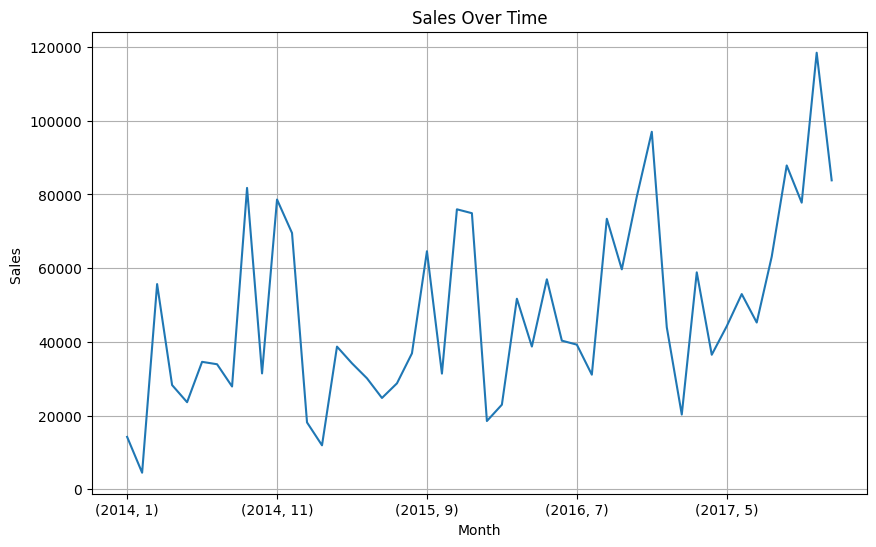

In [6]:
sales = df.groupby(['Year', 'Month'])['Sales'].sum()

# Plot average profit over time
plt.figure(figsize=(10, 6))
sales.plot()
plt.xlabel('Month')
plt.ylabel('Sales ')
plt.title('Sales Over Time')
plt.grid(True)
plt.show()


## Line Chart for Monthly Sales Trends

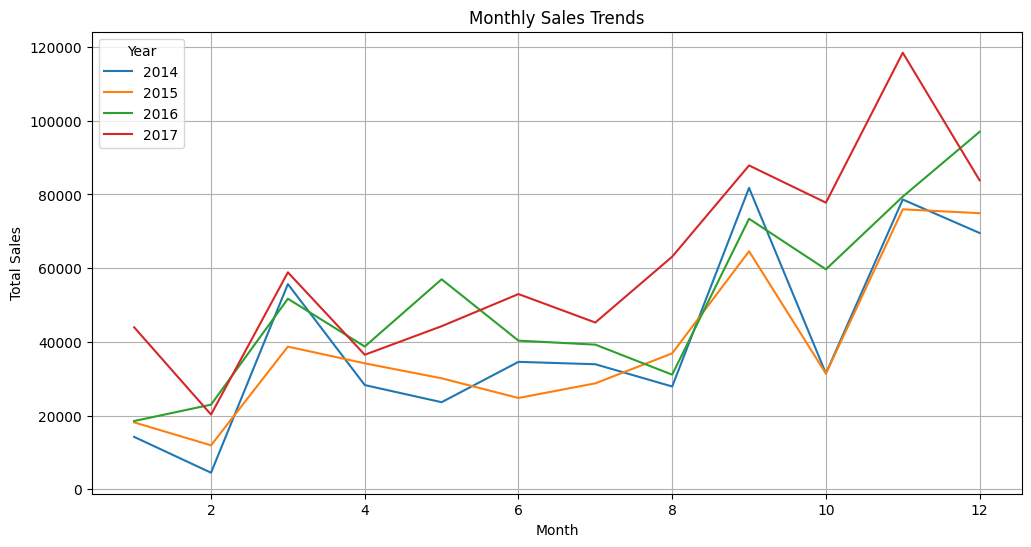

In [7]:
# Line chart for monthly sales trends
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    plt.plot(monthly_sales[monthly_sales['Year'] == year]['Month'],
             monthly_sales[monthly_sales['Year'] == year]['Sales'], label=year)

plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

## Line Chart for Quarterly Sales Trends

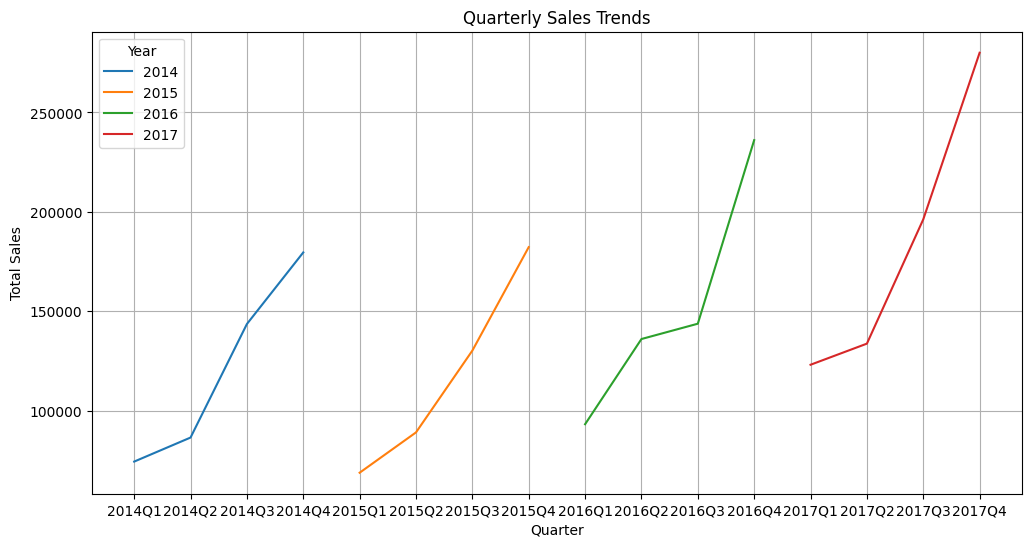

In [8]:
# Line chart for quarterly sales trends
plt.figure(figsize=(12, 6))
for year in quarterly_sales['Year'].unique():
    plt.plot(
        quarterly_sales[quarterly_sales['Year'] == year]['Quarter'].astype(str),
        quarterly_sales[quarterly_sales['Year'] == year]['Sales'], label=year
    )

plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()


## Bar Chart for Yearly Sales Comparison

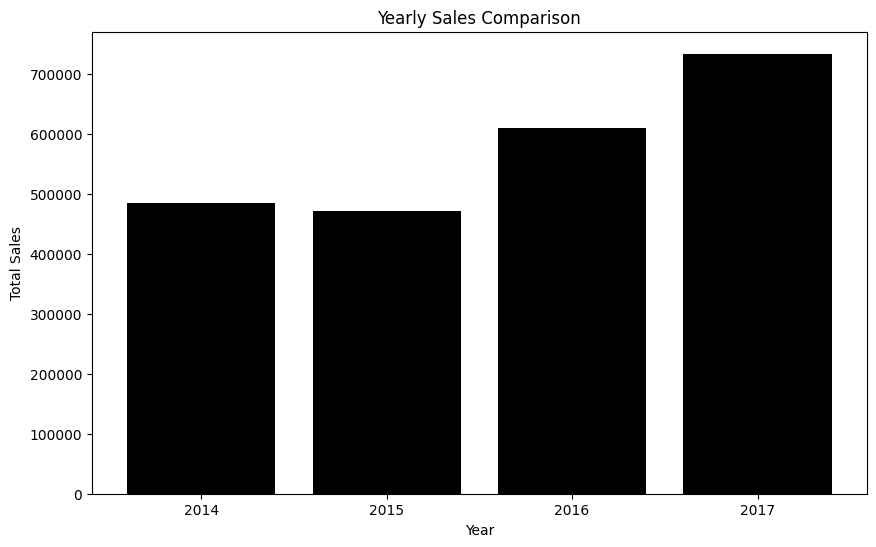

In [9]:
# Bar chart for yearly sales comparison
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Sales'], color='k')

plt.title('Yearly Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales['Year'])
plt.show()


## Pie Chart for Yearly Sales Proportions

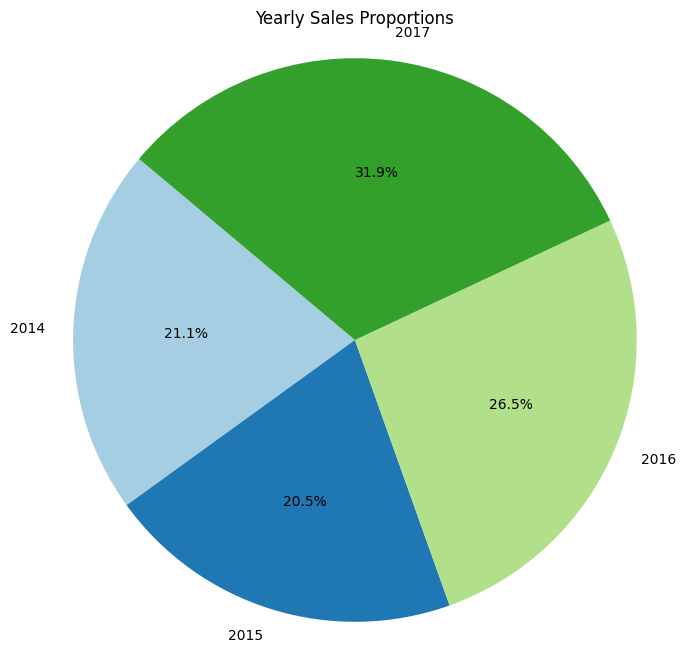

In [10]:
# Pie chart for yearly sales proportions
plt.figure(figsize=(8, 8))
plt.pie(yearly_sales['Sales'], labels=yearly_sales['Year'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('Yearly Sales Proportions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## BEST MONTHS FOR THE SALES

Best months for sales in each year:
    Year  Month        Sales
8   2014      9   81777.3508
22  2015     11   75972.5635
35  2016     12   96999.0430
46  2017     11  118447.8250


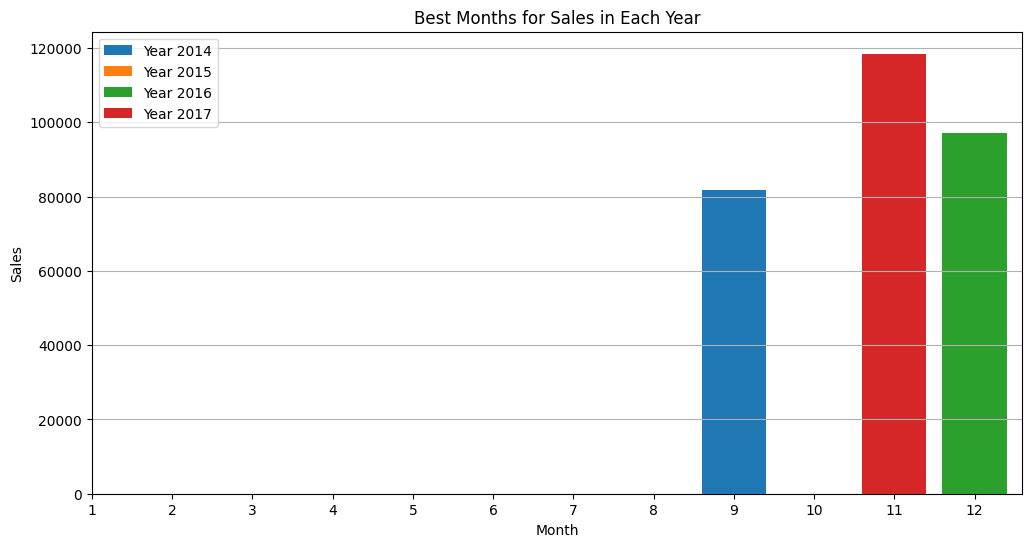

In [11]:

# Group by year and month to calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Find the best month for sales in each year
best_month_sales = monthly_sales.loc[monthly_sales.groupby('Year')['Sales'].idxmax()]

# Print the results
print("Best months for sales in each year:")
print(best_month_sales)


# Plot the best months for sales
plt.figure(figsize=(12, 6))
for year in best_month_sales['Year'].unique():
    data = best_month_sales[best_month_sales['Year'] == year]
    plt.bar(data['Month'], data['Sales'], label=f"Year {year}")

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Best Months for Sales in Each Year')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(axis='y')

plt.show()

## BEST QUARTERS FOR THE SALES

Best quarters for sales in each year:
    Year Quarter        Sales
3   2014  2014Q4  179627.7302
7   2015  2015Q4  182297.0082
11  2016  2016Q4  236098.7538
15  2017  2017Q4  280054.0670


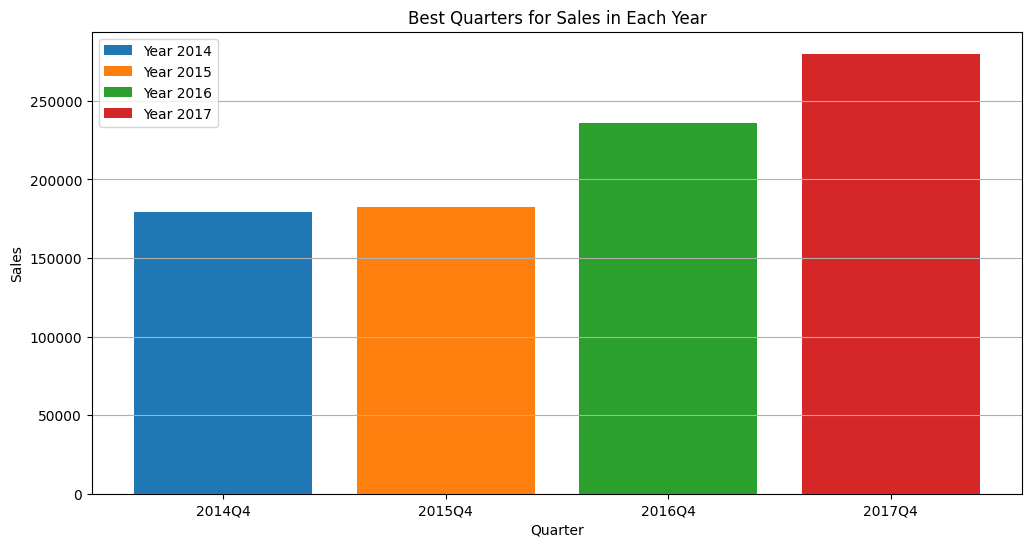

In [12]:

# Group by year and quarter to calculate total sales
quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

# Find the best quarter for sales in each year
best_quarter_sales = quarterly_sales.loc[quarterly_sales.groupby('Year')['Sales'].idxmax()]

# Print the results
print("Best quarters for sales in each year:")
print(best_quarter_sales)


# Plot the best quarters for sales
plt.figure(figsize=(12, 6))
for year in best_quarter_sales['Year'].unique():
    data = best_quarter_sales[best_quarter_sales['Year'] == year]
    plt.bar(data['Quarter'].astype(str), data['Sales'], label=f"Year {year}")

plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Best Quarters for Sales in Each Year')
plt.legend()
plt.grid(axis='y')

plt.show()

## Sales Comparison Across Regions and Categories

In [13]:
# Group by Region and Category, summing up the Sales
grouped_data = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Optionally, you can create a pivot table for a clearer view
pivot_table = pd.pivot_table(grouped_data, values='Sales', index='Region', columns='Category', aggfunc='sum')
print(pivot_table)


Category    Furniture  Office Supplies  Technology
Region                                            
Central   163797.1638       167026.415  170416.312
East      208291.2040       205516.055  264973.981
South     117298.6840       125651.313  148771.908
West      252612.7435       220853.249  251991.832


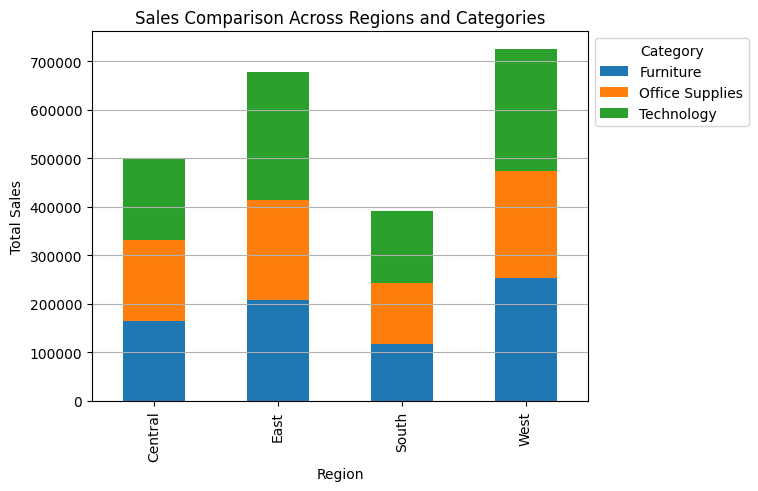

In [14]:

pivot_table.plot(kind='bar', stacked=True)
plt.title('Sales Comparison Across Regions and Categories')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.grid(axis = 'y')
plt.show()

## Sales Percentage Comparison by Category Across Regions

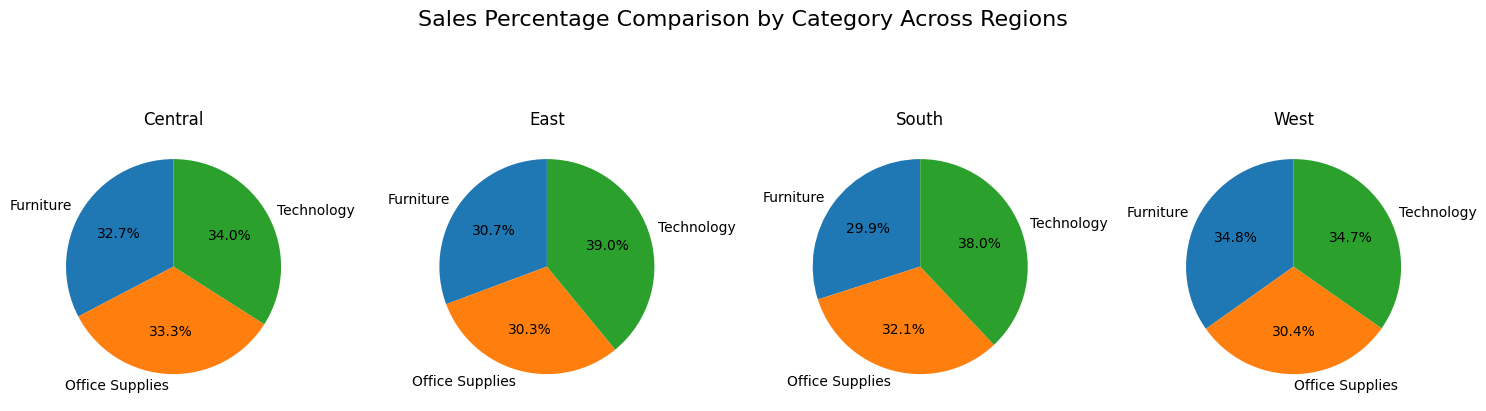

In [15]:

# Calculate percentages for each region
for region in pivot_table.index:
    pivot_table.loc[region] = pivot_table.loc[region] / pivot_table.loc[region].sum() * 100

# Plotting pie charts for each region
regions = pivot_table.index
fig, axs = plt.subplots(nrows=1, ncols=len(regions), figsize=(15, 5))
fig.suptitle('Sales Percentage Comparison by Category Across Regions', fontsize=16)

for i, region in enumerate(regions):
    axs[i].pie(pivot_table.loc[region], labels=pivot_table.columns, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(region)

plt.tight_layout()
plt.show()

## Sales Distribution Across Regions

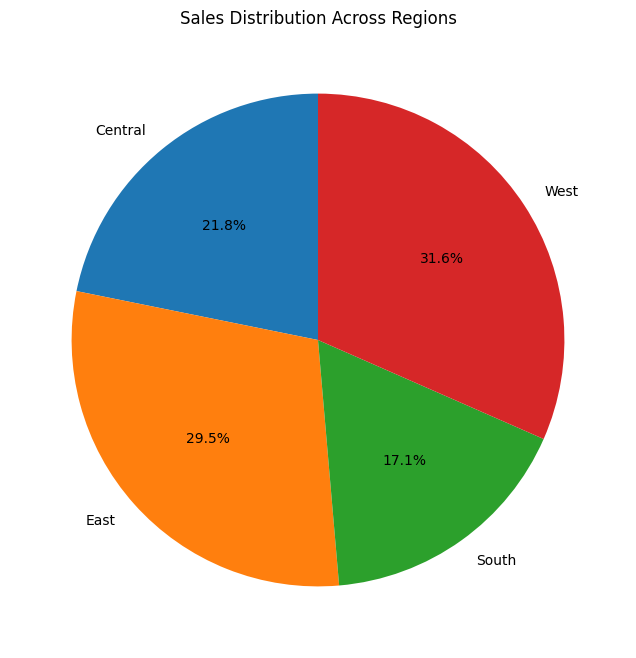

In [16]:

# Group by Region, summing up the Sales
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Plotting pie chart for regions
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution Across Regions')
plt.show()

## SALES DISTRIBUTION ACROSS CITIES

In [17]:

# Calculate total sales by city
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Identify the best performing city
best_performing_city = sales_by_city.idxmax()
best_performing_city_sales = sales_by_city.max()

# Display the best performing city and its sales
print(f"The best performing city is {best_performing_city} with total sales of {best_performing_city_sales}.")
print("\nSales by city:")
print(sales_by_city.head(10))

The best performing city is New York City with total sales of 256368.161.

Sales by city:
City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64


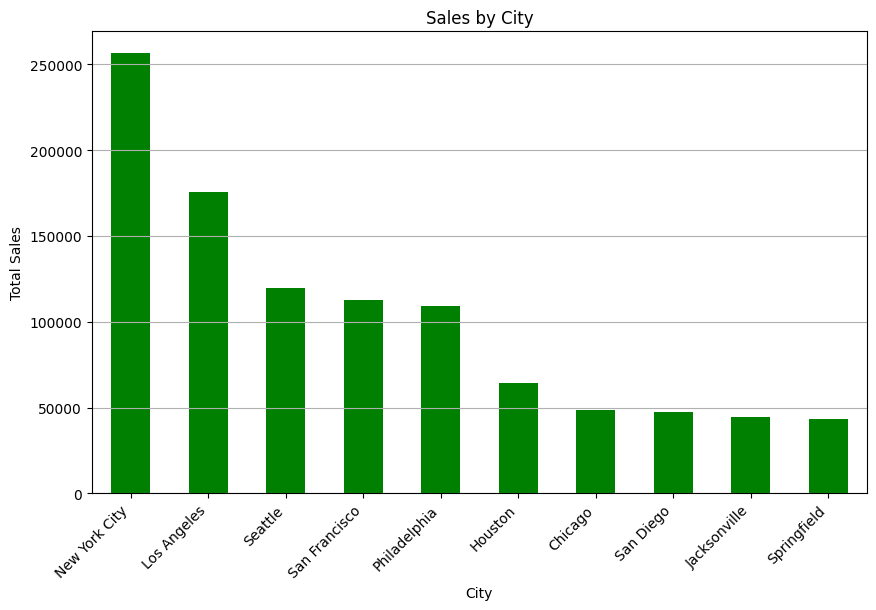

In [18]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sales_by_city.head(10).plot(kind='bar', color='green')
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45,  ha='right')
plt.grid(axis='y')
plt.show()

## SALES DISTRIBUTION BY PRODUCTS CATEGORY

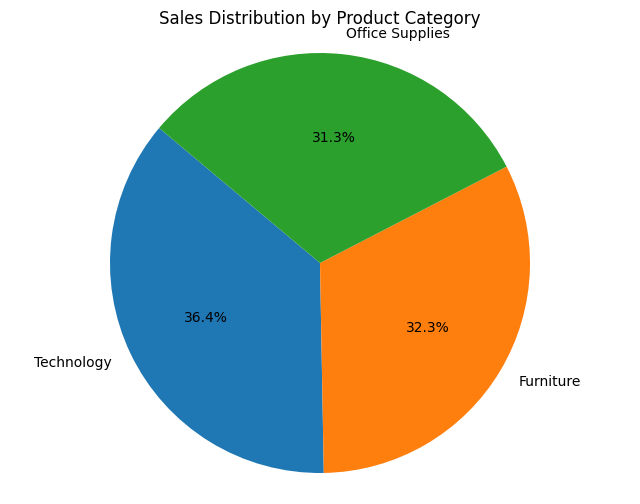

In [19]:
# Calculate sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Customer Segments Analysis

    Customer ID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0      AA-10315    -1273         11  5563.560       2       3       5   
1      AA-10375    -1438         15  1056.390       5       4       2   
2      AA-10480    -1198         12  1790.512       1       3       3   
3      AA-10645    -1402         18  5086.935       3       4       5   
4      AB-10015    -1042          6   886.156       1       1       1   
..          ...      ...        ...       ...     ...     ...     ...   
788    XP-21865    -1414         28  2374.658       4       5       3   
789    YC-21895    -1453          8  5454.350       5       2       5   
790    YS-21880    -1448         12  6720.444       5       3       5   
791    ZC-21910    -1403         31  8025.707       3       5       5   
792    ZD-21925    -1255          9  1493.944       2       2       2   

    RFM_Score             Segment  
0         235              Others  
1         542     Loyal Customers  
2         133  

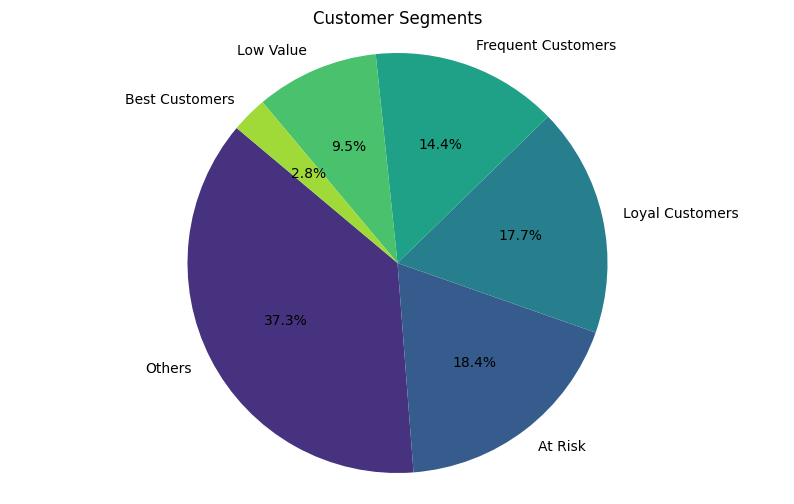

In [20]:

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set reference date (e.g., today)
reference_date = dt.datetime(2014, 1, 3)

# Calculate Recency, Frequency, and Monetary value for each customer
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Score each customer
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Calculate RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segment customers
def segment_customers(df):
    if df['RFM_Score'] == '555':
        return 'Best Customers'
    elif df['R_Score'] == 5:
        return 'Loyal Customers'
    elif df['F_Score'] == 5:
        return 'Frequent Customers'
    elif df['R_Score'] == 1:
        return 'At Risk'
    elif df['M_Score'] == 1:
        return 'Low Value'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customers, axis=1)

# Display the segmented customers
print(rfm)

# Calculate counts for each segment
segment_counts = rfm['Segment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(segment_counts)))
plt.title('Customer Segments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## TOP 10 PERFORMING CUSTOMERS BASED ON MONETARY VALUE

In [21]:

# Identify the top-performing customers based on Monetary value
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)
print("Top Performing Customers:")
print(top_customers[['Customer ID', 'Monetary']])


Top Performing Customers:
    Customer ID   Monetary
700    SM-20320  25043.050
741    TC-20980  19052.218
621    RB-19360  15117.339
730    TA-21385  14595.620
6      AB-10105  14473.571
434    KL-16645  14175.229
669    SC-20095  14142.334
327    HL-15040  12873.298
683    SE-20110  12209.438
131    CC-12370  12129.072


## Customer Retention Rate Analysis Over Years

Customer Yearly Counts and Retention Rates:
   Year  Unique Customers  Retention Rate
0  2014               595             NaN
1  2015               573        0.963025
2  2016               638        1.113438
3  2017               693        1.086207


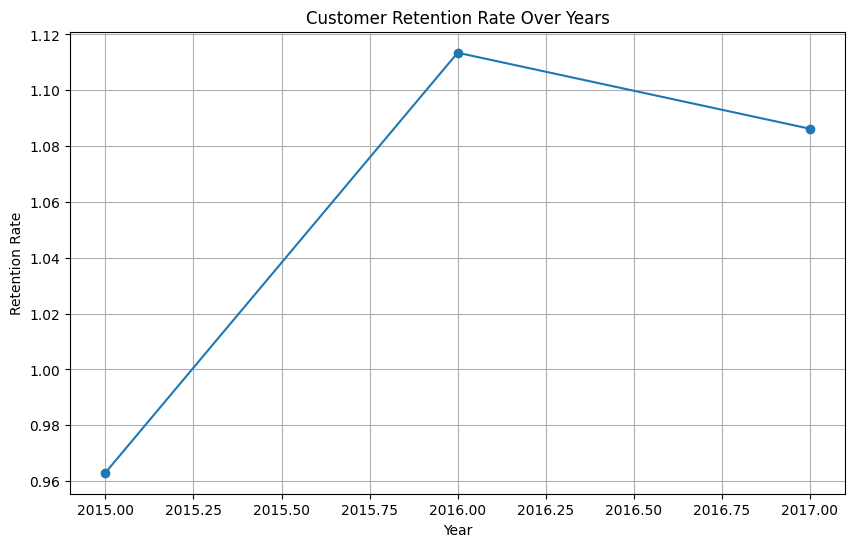

In [22]:
# Calculate customer retention rates
# Extract year from the 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Get unique customer counts per year
customer_yearly_counts = df.groupby('Year')['Customer ID'].nunique().reset_index()
customer_yearly_counts.columns = ['Year', 'Unique Customers']

# Calculate retention rate
customer_yearly_counts['Retention Rate'] = customer_yearly_counts['Unique Customers'].pct_change() + 1

print("Customer Yearly Counts and Retention Rates:")
print(customer_yearly_counts)

# Plotting the retention rates
plt.figure(figsize=(10, 6))
plt.plot(customer_yearly_counts['Year'], customer_yearly_counts['Retention Rate'], marker='o')
plt.title('Customer Retention Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.show()

## CUSTOMER SEGMENTATION ON THE BASIS OF CLV (CUSTOMER LIFETIME VALUE)........

In [23]:

# Calculate Total Sales per Customer
customer_sales = df.groupby('Customer ID')['Sales'].sum().reset_index()
customer_sales.columns = ['Customer ID', 'Total Sales']

# Calculate the Average Purchase Value per Customer
customer_order_count = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
customer_order_count.columns = ['Customer ID', 'Order Count']

# Merge the total sales and order count dataframes
customer_data = pd.merge(customer_sales, customer_order_count, on='Customer ID')

# Calculate Average Purchase Value (APV)
customer_data['APV'] = customer_data['Total Sales'] / customer_data['Order Count']

# Calculate the Average Purchase Frequency (APF)
total_orders = df['Order ID'].nunique()
total_customers = df['Customer ID'].nunique()
APF = total_orders / total_customers

# Calculate Customer Value (CV)
customer_data['Customer Value'] = customer_data['APV'] * APF

# Estimate the Customer Lifespan (CL)
df['Year'] = df['Order Date'].dt.year
customer_lifespan = df.groupby('Customer ID')['Year'].apply(lambda x: x.max() - x.min() + 1).mean()

# Calculate Customer Lifetime Value (CLV)
customer_data['CLV'] = customer_data['Customer Value'] * customer_lifespan

# Print the customer lifetime value data
print(customer_data[['Customer ID', 'CLV']])

    Customer ID           CLV
0      AA-10315  24621.792681
1      AA-10375   2597.279397
2      AA-10480   9904.992320
3      AA-10645  18760.388874
4      AB-10015   6536.207427
..          ...           ...
788    XP-21865   4776.890480
789    YC-21895  24138.478763
790    YS-21880  18588.522781
791    ZC-21910  13660.822447
792    ZD-21925   6611.518424

[793 rows x 2 columns]


## Top 10 High CLV Customers

    Customer ID  Total Sales  Order Count          APV  Customer Value  \
700    SM-20320    25043.050            5  5008.610000    31636.982963   
741    TC-20980    19052.218            5  3810.443600    24068.741478   
730    TA-21385    14595.620            4  3648.905000    23048.379754   
310    GT-14635     9351.212            3  3117.070667    19689.037792   
90     BM-11140    11789.630            4  2947.407500    18617.357084   
547    MW-18235     5253.876            2  2626.938000    16593.105223   
621    RB-19360    15117.339            6  2519.556500    15914.827880   
131    CC-12370    12129.072            5  2425.814400    15322.704073   
588    PF-19120     9062.864            4  2265.716000    14311.439400   
160    CM-12385     8954.020            4  2238.505000    14139.560586   

               CLV  
700  110829.178654  
741   84316.473931  
730   80741.991118  
310   68973.703641  
90    65219.442596  
547   58128.179458  
621   55752.070428  
131   53677.77038

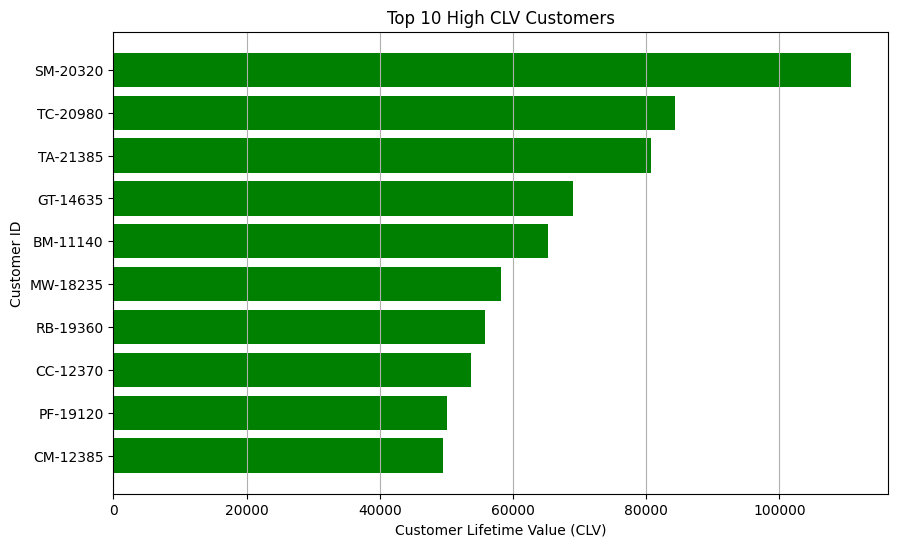

In [24]:
# Sort customers by CLV in descending order to get top 10 high CLV customers
top_high_clv_customers = customer_data.sort_values(by='CLV', ascending=False).head(10)

print(top_high_clv_customers)

# Plot the top 10 high CLV customers
plt.figure(figsize=(10, 6))
plt.barh(top_high_clv_customers['Customer ID'], top_high_clv_customers['CLV'], color='green')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Customer ID')
plt.title('Top 10 High CLV Customers')
plt.gca().invert_yaxis()  # Highest CLV customers on top
plt.grid(True, axis='x')

plt.show()


## Top 10 Low CLV Customers

    Customer ID  Total Sales  Order Count        APV  Customer Value  \
760    TS-21085        4.833            2   2.416500       15.263869   
456    LD-16855        5.304            1   5.304000       33.502820   
659    RS-19870       22.328            2  11.164000       70.517624   
690    SG-20890       47.946            3  15.982000      100.950615   
145    CJ-11875       16.520            1  16.520000      104.348903   
448    LB-16735       50.188            3  16.729333      105.671161   
508    MG-18205       16.739            1  16.739000      105.732221   
344    JC-15340       71.263            4  17.815750      112.533533   
291    FW-14395       79.750            3  26.583333      167.914145   
53     AS-10135       58.820            2  29.410000      185.768840   

            CLV  
760   53.471664  
456  117.365489  
659  247.033998  
690  353.645409  
145  365.550129  
448  370.182201  
508  370.396102  
344  394.222137  
291  588.228870  
53   650.776592  


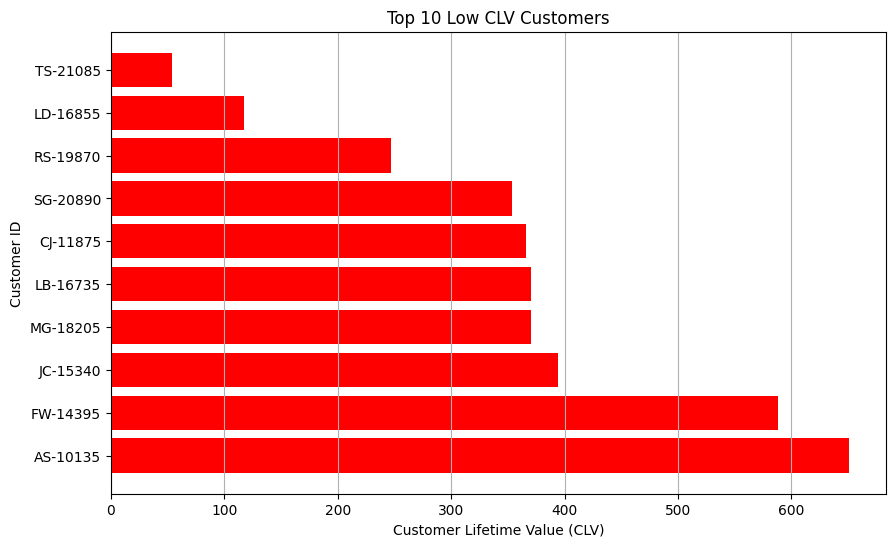

In [25]:
# Sort customers by CLV in ascending order to get top 10 low CLV customers
top_low_clv_customers = customer_data.sort_values(by='CLV', ascending=True).head(10)

print(top_low_clv_customers)

# Plot the top 10 low CLV customers
plt.figure(figsize=(10, 6))
plt.barh(top_low_clv_customers['Customer ID'], top_low_clv_customers['CLV'], color='red')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Customer ID')
plt.title('Top 10 Low CLV Customers')
plt.gca().invert_yaxis()  # Lowest CLV customers on top
plt.grid(True, axis='x')

plt.show()


## PRODUCT ANALYSIS BASED ON BEST SELLING AND WORST SELLING

In [26]:

# Calculate total sales and quantity sold for each product
product_sales = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Sort products by total sales in descending order to find best-selling products
best_selling_products = product_sales.sort_values(by='Sales', ascending=False)

# Sort products by total sales in ascending order to find worst-selling products
worst_selling_products = product_sales.sort_values(by='Sales')

# Display best-selling and worst-selling products
print("Best-Selling Products:")
print(best_selling_products.head(10))  # Display top 10 best-selling products
print("\nWorst-Selling Products:")
print(worst_selling_products.head(10))  # Display top 10 worst-selling products


Best-Selling Products:
                                          Product Name      Sales  Quantity
404              Canon imageCLASS 2200 Advanced Copier  61599.824        20
650  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384        31
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480         6
786       HON 5400 Series Task Chairs for Big and Tall  21870.576        39
686         GBC DocuBind TL300 Electric Binding System  19823.479        37
688   GBC Ibimaster 500 Manual ProClick Binding System  19024.500        48
805               Hewlett Packard LaserJet 3310 Copier  18839.686        38
787  HP Designjet T520 Inkjet Large Format Printer ...  18374.895        12
683          GBC DocuBind P400 Electric Binding System  17965.068        27
813        High Speed Automatic Electric Letter Opener  17030.312        11

Worst-Selling Products:
                                           Product Name  Sales  Quantity
605   Eureka Disposable Bags for Sanitaire 

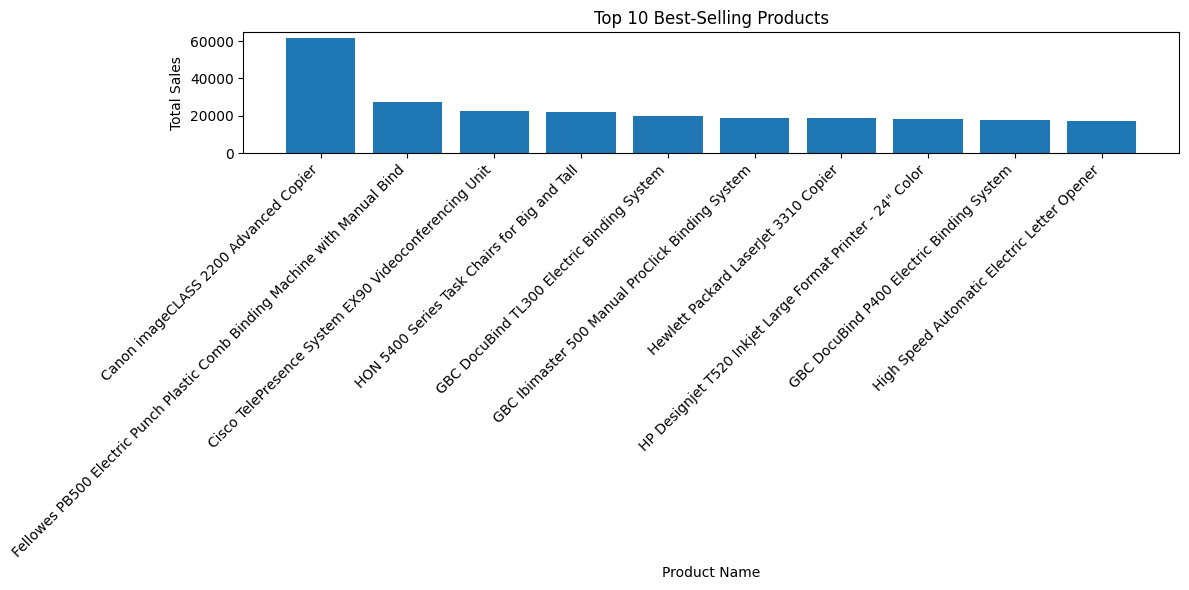

In [27]:

# Plotting the best-selling products
plt.figure(figsize=(12, 6))
plt.bar(best_selling_products['Product Name'][:10], best_selling_products['Sales'][:10])
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


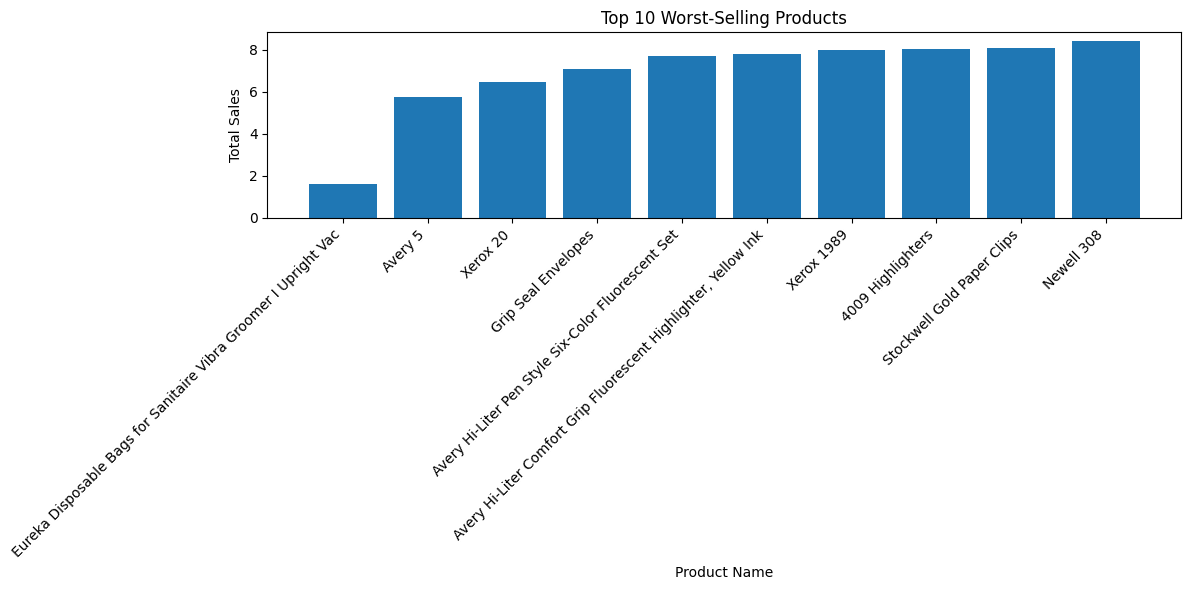

In [28]:

# Plotting the worst-selling products
plt.figure(figsize=(12, 6))
plt.bar(worst_selling_products['Product Name'][:10], worst_selling_products['Sales'][:10])
plt.title('Top 10 Worst-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## PRODUCTS DISTRIBUTION INTO THE A,B,C CLASS TO FIND OUT THE BEST PRODUCTS..

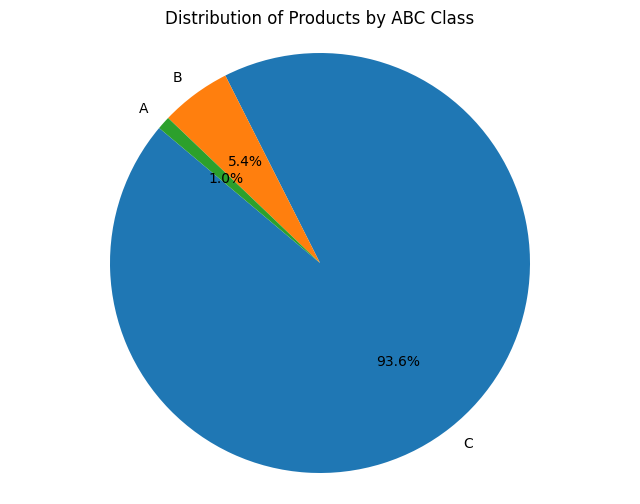

In [29]:
# Calculate contribution to overall sales
df['Contribution (%)'] = (df['Sales'] / df['Sales'].sum()) * 100

# Rank products by contribution
df = df.sort_values(by='Contribution (%)', ascending=False)

# Calculate cumulative contribution
df['Cumulative Contribution (%)'] = df['Contribution (%)'].cumsum()

# Categorize products into ABC classes
def categorize_class(contribution):
    if contribution <= 20:
        return 'A'
    elif contribution <= 50:
        return 'B'
    else:
        return 'C'

df['ABC Class'] = df['Cumulative Contribution (%)'].apply(categorize_class)

# Calculate the count of products in each ABC class
abc_counts = df['ABC Class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(abc_counts, labels=abc_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by ABC Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Distribution of A, B, C Class Products in category

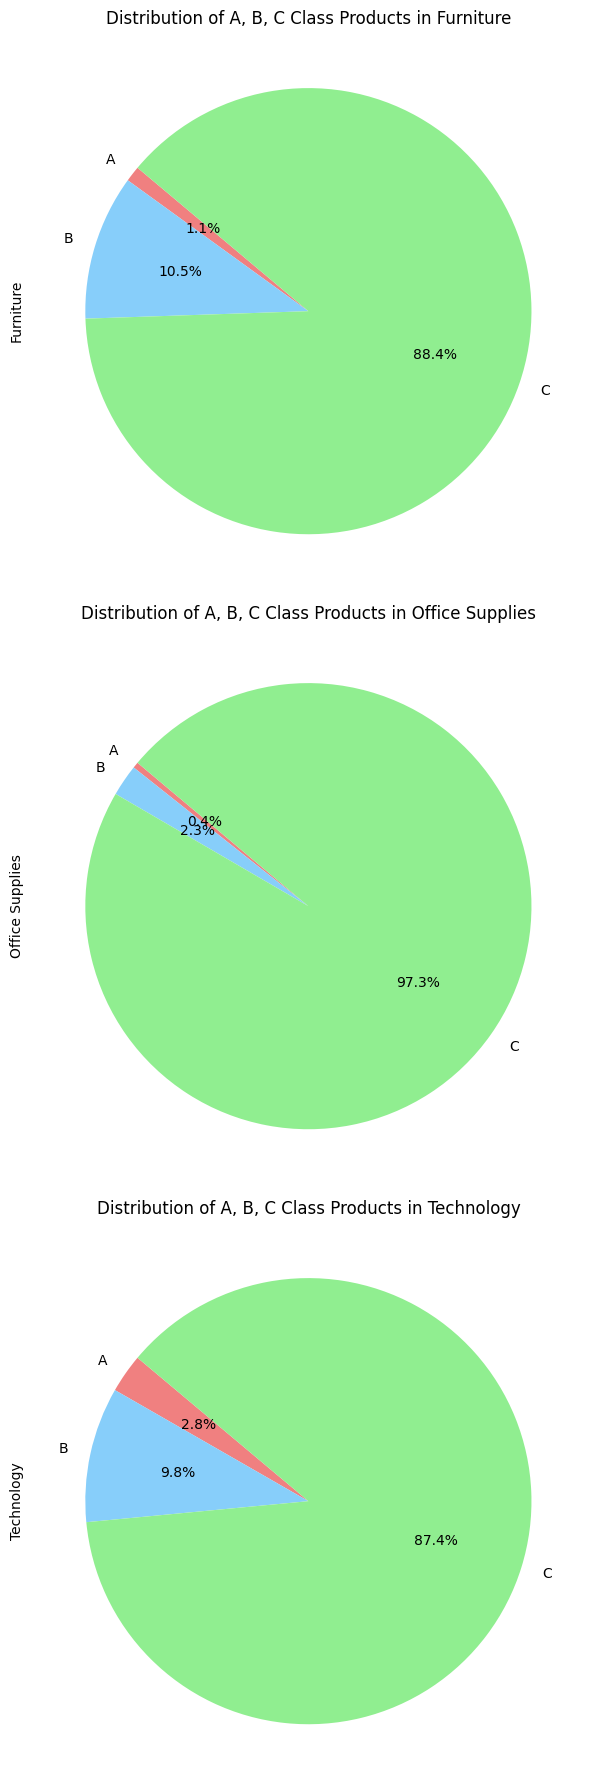

In [30]:
# Calculate the count of A, B, C class products within each category
abc_counts_by_category = df.groupby(['Category', 'ABC Class']).size().unstack(fill_value=0)

# Plotting the nested pie chart
fig, axes = plt.subplots(nrows=len(abc_counts_by_category), ncols=1, figsize=(8, 6 * len(abc_counts_by_category)))

colors = {'A': 'lightcoral', 'B': 'lightskyblue', 'C': 'lightgreen'}
for idx, (category, counts) in enumerate(abc_counts_by_category.iterrows()):
    ax = axes[idx]
    counts.plot(kind='pie', colors=[colors[col] for col in counts.index], ax=ax, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of A, B, C Class Products in {category}')

plt.tight_layout()  # Ensure proper spacing
plt.show()

# PROFIT ANALYSIS

## BEST MONTHS FOR THE PROFIT

Best months for profit in each year:
    Year  Month      Profit
10  2014     11   9292.1269
22  2015     11  12474.7884
35  2016     12  17885.3093
38  2017      3  14751.8915


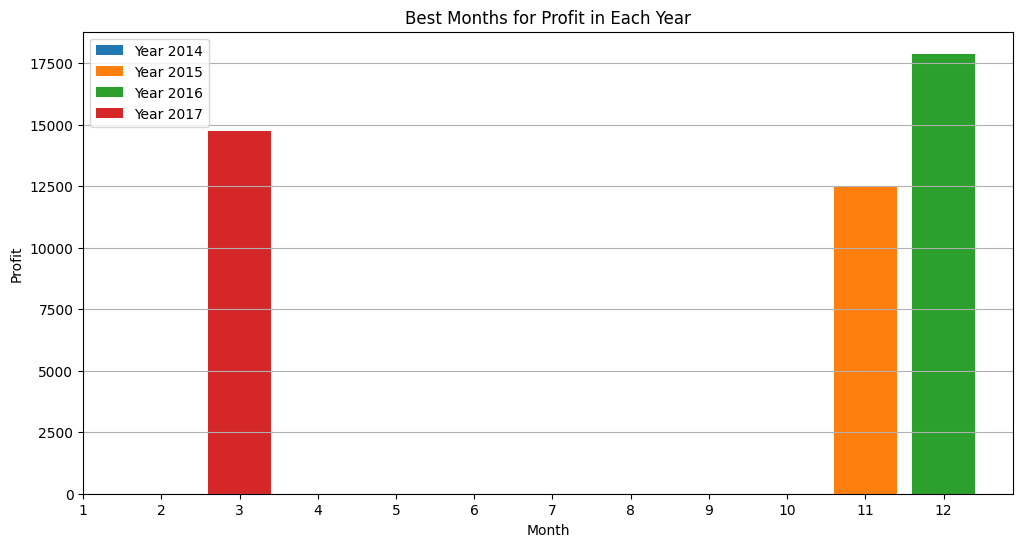

In [31]:
# Group by year and month to calculate total profit
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Find the best month for profit in each year
best_month_profit = monthly_profit.loc[monthly_profit.groupby('Year')['Profit'].idxmax()]

# Print the results
print("Best months for profit in each year:")
print(best_month_profit)


# Plot the best months for profit
plt.figure(figsize=(12, 6))
for year in best_month_profit['Year'].unique():
    data = best_month_profit[best_month_profit['Year'] == year]
    plt.bar(data['Month'], data['Profit'], label=f"Year {year}")

plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Best Months for Profit in Each Year')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(axis='y')

plt.show()

## BEST QUARTERS FOR THE PROFIT

Best quarters for profit in each year:
    Year Quarter      Profit
3   2014  2014Q4  21723.9541
7   2015  2015Q4  23309.1203
11  2016  2016Q4  38139.8593
15  2017  2017Q4  27448.7260


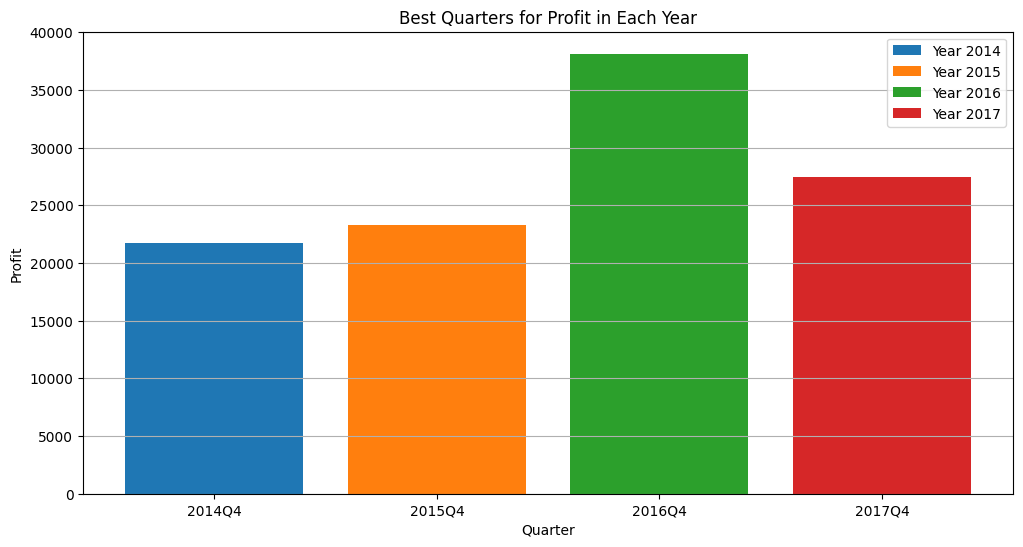

In [32]:
# Group by year and quarter to calculate total profit
quarterly_profit = df.groupby(['Year', 'Quarter'])['Profit'].sum().reset_index()

# Find the best quarter for profit in each year
best_quarter_profit = quarterly_profit.loc[quarterly_profit.groupby('Year')['Profit'].idxmax()]

# Print the results
print("Best quarters for profit in each year:")
print(best_quarter_profit)


# Plot the best quarters for profit
plt.figure(figsize=(12, 6))
for year in best_quarter_profit['Year'].unique():
    data = best_quarter_profit[best_quarter_profit['Year'] == year]
    plt.bar(data['Quarter'].astype(str), data['Profit'], label=f"Year {year}")

plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.title('Best Quarters for Profit in Each Year')
plt.legend()
plt.grid(axis='y')

plt.show()

## Monthly Profit Trends Over The Years

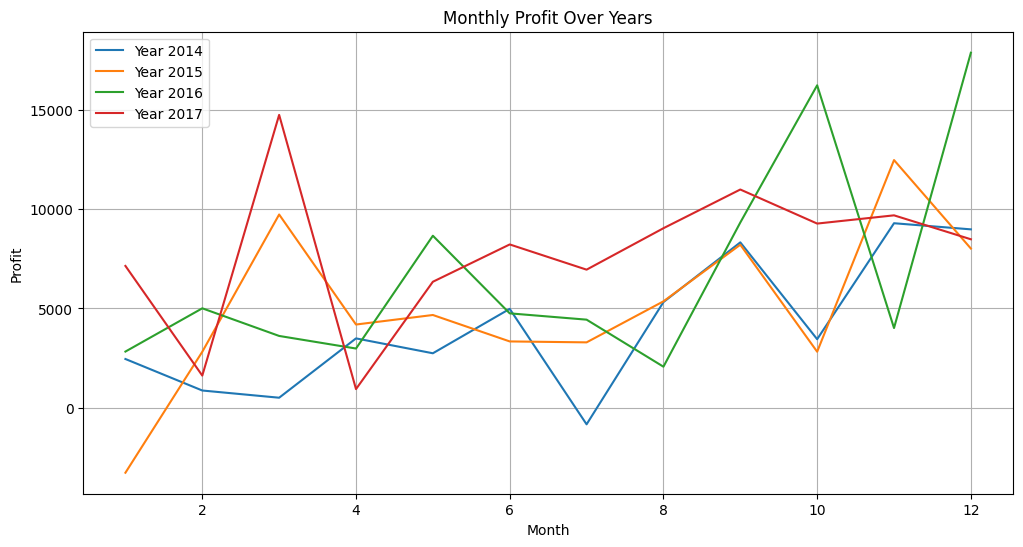

In [33]:

# Group by Year and Month and calculate total profit
monthly_profit = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

# Plot the profit trend
plt.figure(figsize=(12, 6))
for year in monthly_profit['Year'].unique():
    data = monthly_profit[monthly_profit['Year'] == year]
    plt.plot(data['Month'], data['Profit'], label=f"Year {year}")

plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Over Years')
plt.legend()
plt.grid(True)
plt.show()

## Profit Margin Analysis by Category

Category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: Profit Margin (%), dtype: float64


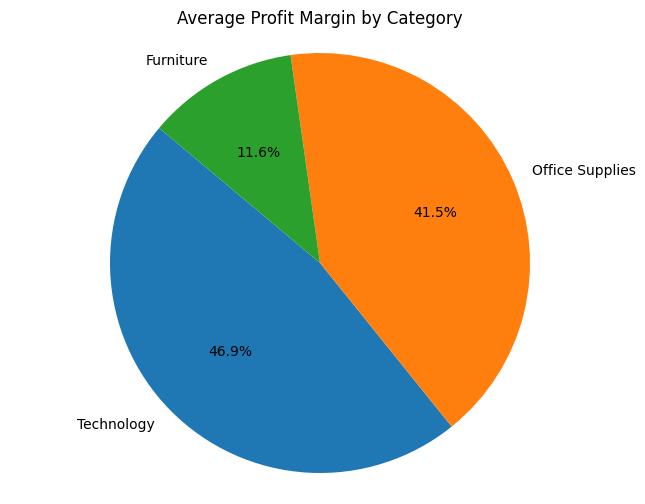

In [34]:
# Calculate profit margins (%)
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Group by product or category and calculate average profit margin
avg_profit_margin = df.groupby('Category')['Profit Margin (%)'].mean().sort_values(ascending=False)

print(avg_profit_margin)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(avg_profit_margin, labels=avg_profit_margin.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Profit Margin by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## PROFIT ANALYSIS OVER TIME

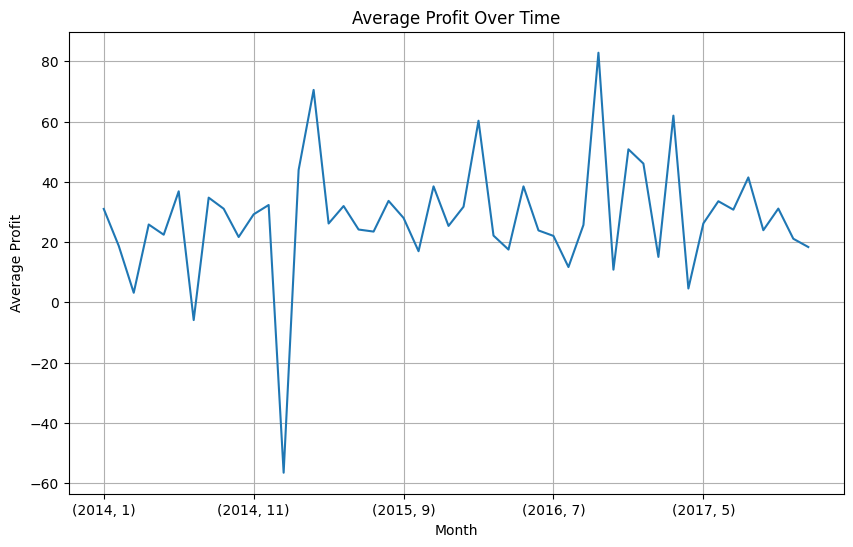

In [35]:

# Group by year and month, then calculate average profit
avg_profit_by_month = df.groupby(['Year', 'Month'])['Profit'].mean()

# Plot average profit over time
plt.figure(figsize=(10, 6))
avg_profit_by_month.plot()
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.title('Average Profit Over Time')
plt.grid(True)
plt.show()

## PROFIT ANALSIS BY REGIONS

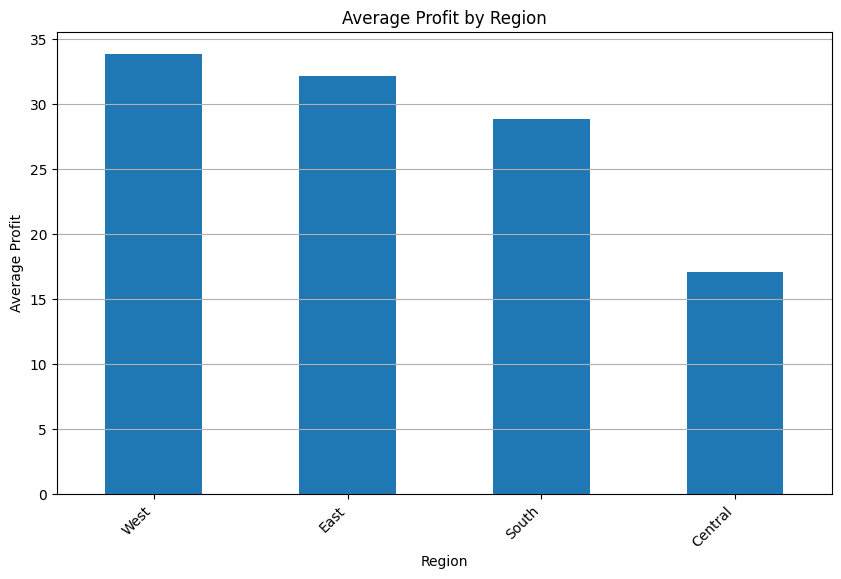

In [36]:
# Group by region and calculate average profit
avg_profit_by_region = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)

# Plot average profit by region
plt.figure(figsize=(10, 6))
avg_profit_by_region.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Average Profit')
plt.title('Average Profit by Region')
plt.xticks(rotation=45, ha = 'right')
plt.grid(axis='y')
plt.show()


## PROFIT DISTRIBUTION ACROSS CITIES

In [37]:

# Calculate total profit by city
profit_by_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False)

# Select the top 10 cities
top_10_cities_profit = profit_by_city.head(10)

# Display the top 10 cities and their profit
print("Top 10 Cities by Profit:")
print(top_10_cities_profit)

Top 10 Cities by Profit:
City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64


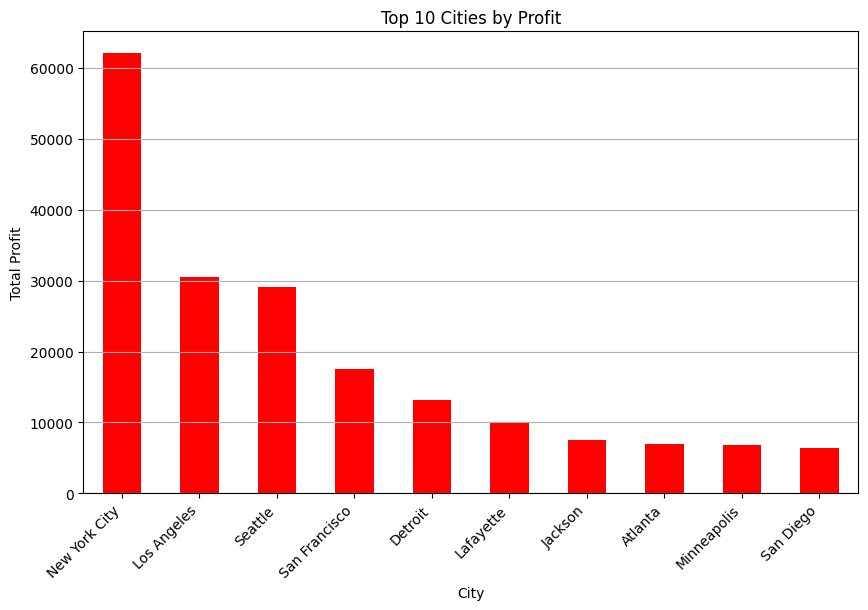

In [38]:

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_cities_profit.plot(kind='bar', color='RED')
plt.title('Top 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

## PROFIT MARGIN FOR EACH PRODUCT

In [39]:

# Calculate profit margin for each product
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group by Product Name and calculate average profit margin
product_profit_margin = df.groupby('Product Name')['Profit Margin'].mean().reset_index()

# Print the results
print("Profit Margins for Products:")
print(product_profit_margin)

Profit Margins for Products:
                                           Product Name  Profit Margin
0     "While you Were Out" Message Book, One Form pe...       0.416667
1              #10 Gummed Flap White Envelopes, 100/Box       0.392500
2                         #10 Self-Seal White Envelopes       0.458125
3            #10 White Business Envelopes,4 1/8 x 9 1/2       0.432143
4               #10- 4 1/8" x 9 1/2" Recycled Envelopes       0.417000
...                                                 ...            ...
1845  iKross Bluetooth Portable Keyboard + Cell Phon...       0.208000
1846                         iOttie HLCRIO102 Car Mount      -0.171667
1847                                iOttie XL Car Mount      -0.225000
1848  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...       0.356190
1849                 netTALK DUO VoIP Telephone Service       0.392857

[1850 rows x 2 columns]


##  Best and Worst Performing Products by Profit

In [40]:
# Group by Product Name and calculate total profit
product_profit = df.groupby('Product Name')['Profit'].sum().reset_index()

# Sort products by profit
top_profit_products = product_profit.sort_values(by='Profit', ascending=False).head(10)
bottom_profit_products = product_profit.sort_values(by='Profit', ascending=True).head(10)

# Print top and bottom products by profit
print("Top 10 Performing Products by Profit:")
print(top_profit_products)

print("\nTop 10 Worst Performing Products by Profit:")
print(bottom_profit_products)


Top 10 Performing Products by Profit:
                                           Product Name      Profit
404               Canon imageCLASS 2200 Advanced Copier  25199.9280
650   Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
805                Hewlett Packard LaserJet 3310 Copier   6983.8836
400                  Canon PC1060 Personal Laser Copier   4570.9347
787   HP Designjet T520 Inkjet Large Format Printer ...   4094.9766
165                   Ativa V4110MDD Micro-Cut Shredder   3772.9461
19     3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
1276  Plantronics Savi W720 Multi-Device Wireless He...   3696.2820
895                Ibico EPK-21 Electric Binding System   3345.2823
1840                  Zebra ZM400 Thermal Label Printer   3343.5360

Top 10 Worst Performing Products by Profit:
                                           Product Name     Profit
475           Cubify CubeX 3D Printer Double Head Print -8879.9704
985           Lexmark MX611dhe Mono

## Top 10 Performing Products by Profit

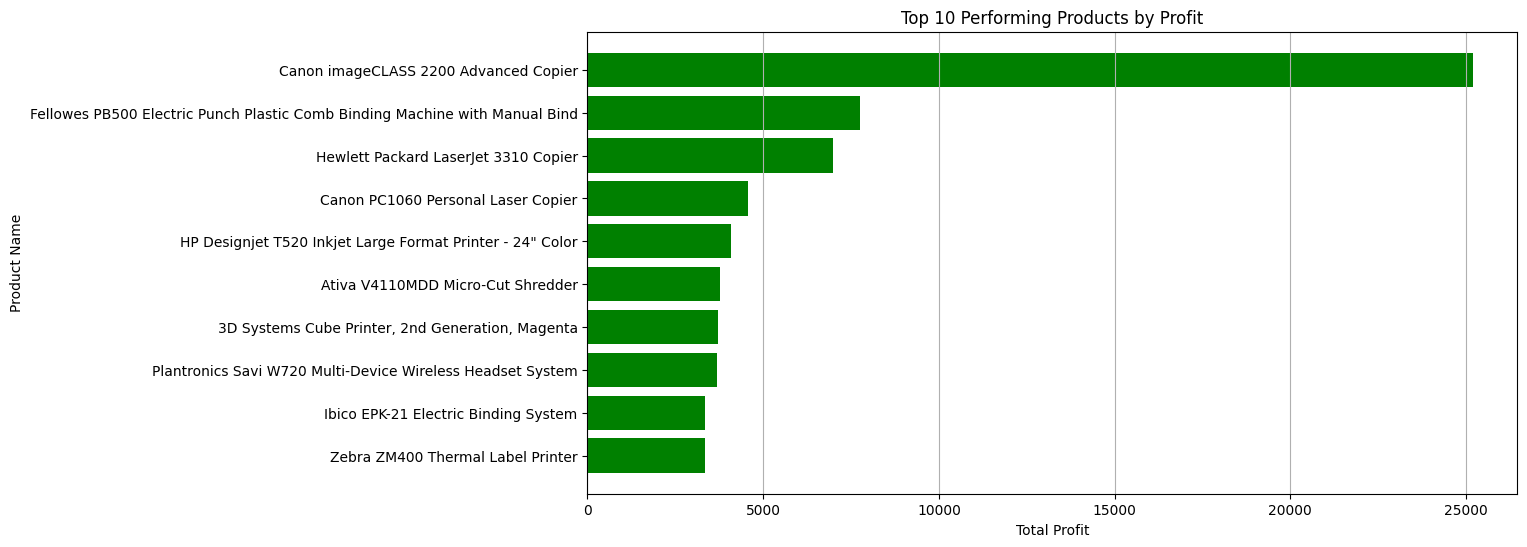

In [41]:

# Plot the top performing products by profit
plt.figure(figsize=(12, 6))
plt.barh(top_profit_products['Product Name'], top_profit_products['Profit'], color='green')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.title('Top 10 Performing Products by Profit')
plt.gca().invert_yaxis()  # Highest profit on top
plt.grid(True, axis='x')

plt.show()

## Top 10 Worst Performing Products by Profit

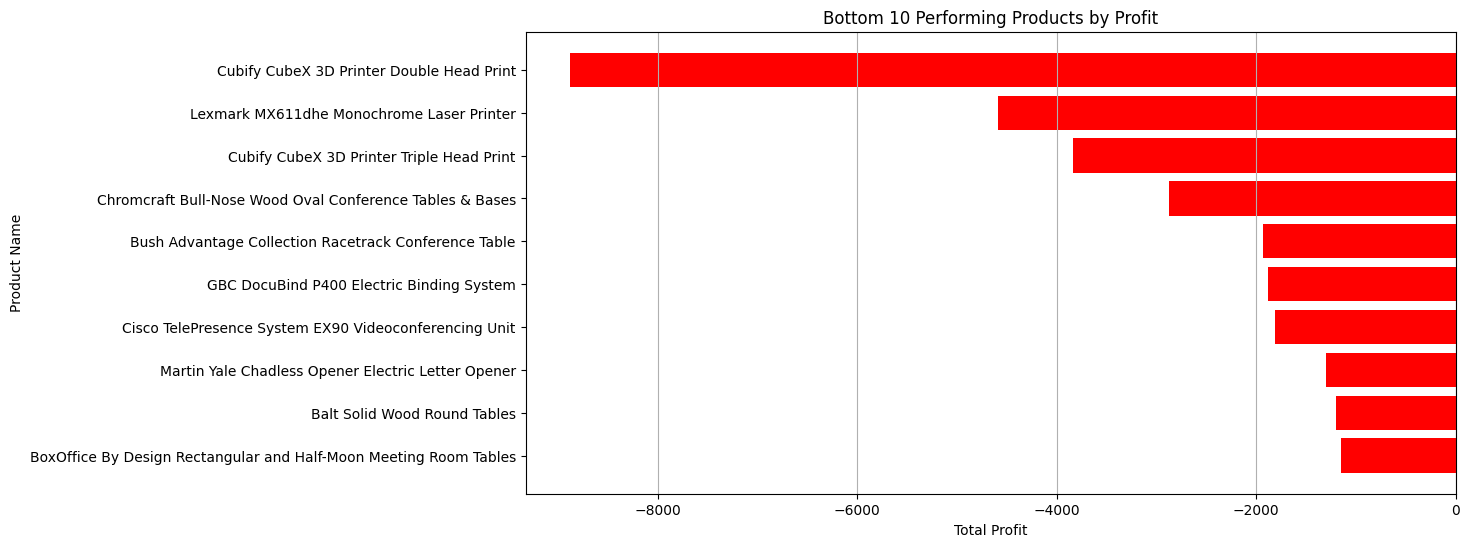

In [42]:

# Plot the bottom performing products by profit
plt.figure(figsize=(12, 6))
plt.barh(bottom_profit_products['Product Name'], bottom_profit_products['Profit'], color='red')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.title('Bottom 10 Performing Products by Profit')
plt.gca().invert_yaxis()  # Lowest profit on top
plt.grid(True, axis='x')

plt.show()

## Correlation analysis

            Profit     Sales  Discount
Profit    1.000000  0.479064 -0.219487
Sales     0.479064  1.000000 -0.028190
Discount -0.219487 -0.028190  1.000000


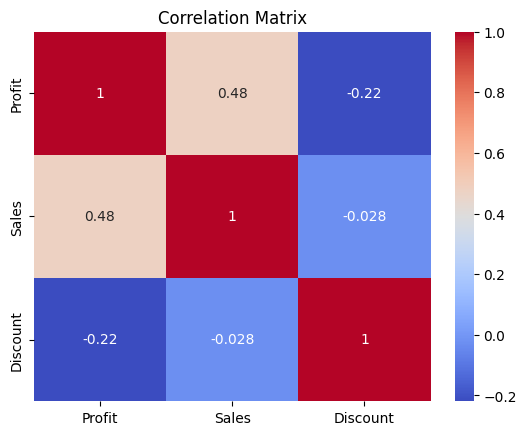

In [43]:
# Correlation analysis
correlation_matrix = df[['Profit', 'Sales', 'Discount']].corr()
print(correlation_matrix)

# Visualize correlations using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# THANK YOU...............